<a href="https://colab.research.google.com/github/NabilBADRI/Multidialect-Project/blob/main/NLP_fasttext_Aravec_CNN_Embedding_TUNEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUNEL Dataset

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train=pd.read_excel('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/final-dataset.xlsx')
# test=pd.read_excel('/content/drive/MyDrive/kaggle-nabil-badri/Text Classification Notebooks/BI-GRU/MyArticle-dataset-arabe/dataset1and2.xlsx')
label=pd.read_excel('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/final-dataset.xlsx',header=None).iloc[:,-1]
#OFF=0 
#NOT=1

In [ ]:
train['word_count'] = train['commentaire'].apply(lambda x : len(x.split()))
train

,commentaire,classe,word_count
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,normal,16
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,hate,10
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,normal,9
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,hate,8
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,hate,16
...,...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,hate,10
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,hate,7
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,normal,14
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,normal,13


In [ ]:
# #Encoding
# df.label.replace({'normal':0,'abusive':1,'spam':2,'hateful':3},inplace=True)
# df.head()

In [ ]:
train[train['word_count'] == 388]

,commentaire,classe,word_count
8233,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...,normal,388
9481,صديقتي أمال اقرئي تعليقي سمحتي صدقيني صدقيني ا...,normal,388


In [ ]:
train['commentaire'][3335]

'   نعم ، على القول بوجوب النقاب ، لأن التبرج معناه الظهور فلما تكون ساترة لوجهها وتظهره فهذه متبرجة'

In [ ]:
y_train=train['classe']
X_train=train['commentaire']
#test=test['comm']
y_train=pd.factorize(y_train)[0]
# y_test=pd.factorize(y_test)[0]
train['labels'] = pd.factorize(y_train)[0]

import collections
collections.Counter(y_train)

#Counter({0: 4400, 1: 8840})

Counter({0: 12353, 1: 6830, 2: 3850})

In [ ]:
train

,commentaire,classe,word_count,labels
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,normal,16,0
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,hate,10,1
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,normal,9,0
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,hate,8,1
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,hate,16,1
...,...,...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,hate,10,1
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,hate,7,1
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,normal,14,0
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,normal,13,0


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#cleaning data
import re
from nltk.stem.porter import PorterStemmer
tokenizer=nltk.tokenize.WhitespaceTokenizer()
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")

def preprocess(review):
   review = re.sub('[^ا-ي]', ' ', review)
 
   review = tokenizer.tokenize(review)
   review = [ar_stemmer.stemWord(word) for word in review if not word in set(stopwords_list )]
   review = ' '.join(review)
   return review

In [ ]:
# X_train = train['commentaire'].apply(preprocess)
X_train = X_train.apply(preprocess)


In [ ]:
X_train[0] ### Après preprocessing

'مبر سامح لعجز تام عقبال الل جوه الل بره عاجز يزايد عاجز'

In [ ]:
train['commentaire'][0] ### Originale

'مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. اللي بره يا عاجز يا بيزايد على العاجز'

In [ ]:
# x=train[323].lower().replace('@user','').replace('url','')
# x=re.sub('[^A-Za-z]', ' ', x)
# re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x)

In [ ]:
# # Creating the training corpus
# stop_words = set(stopwords.words("english")) 
# lemmatizer = WordNetLemmatizer()
# corpus_train = []
# for i in train:
#     x=i.lower()
#     x=x.replace('@user','')
#     x=x.replace('@[\w\-]+','')
#     #x=x.translate(str.maketrans('', '', string.punctuation))
#     x = re.sub('[^A-Za-z]', ' ', x)
#     #x=re.sub('\s+',' ',x)
#     x=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x) #url
#     #x = [lemmatizer.lemmatize(token) for token in x.split(" ")]
#     #x = [word for word in x if not word in stop_words]
#     #x=" ".join(x)
#     corpus_train.append(x)    
# # Creating the training corpus
# corpus_test = []
# for i in test:
#     x=i.lower()
#     x=x.replace('@user','')
#     x=x.replace('@[\w\-]+','')
#     #x=x.translate(str.maketrans('', '', string.punctuation))
#     x = re.sub('[^A-Za-z]', ' ', x)
#     #x=re.sub('\s+',' ',x)
#     x=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
#         '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x) #url
#     #x = [lemmatizer.lemmatize(token) for token in x.split(" ")]
#     #x = [word for word in x if not word in stop_words]
#     #x=" ".join(x)
#     corpus_test.append(x) 

In [ ]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import sequence
# max_words = 5000 #frequency of words to be kept
# max_len = 200
# tokenize = Tokenizer(num_words=max_words)
# tokenize.fit_on_texts(corpus_train)
# sequences = tokenize.texts_to_sequences(corpus_train)
# word_index = tokenize.word_index
# sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
# splitting the data into target and feature
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train ,test_size = 0.1, random_state=0)
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1 
vocab_size # Adding 1 because of reserved 0 index

23966

In [ ]:
word_index = tokenizer.word_index


In [ ]:
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)
print('Max len:', maxlen)

Max len: 388


In [ ]:
# len(x.split())

# lens_train = [len(i.split()) for i in list(train['commentaire'])]
# lens_test = [len(i.split()) for i in X_test]
# lens = lens_train + lens_test

# maxlen_ = np.max(train['word_count'])
# print('Max len:', maxlen_)


In [ ]:
# num_words = min(max_words, len(word_index)) + 1
# print(num_words)

In [ ]:
### AraVec embeddings
# !wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_cbow_300_twitter.zip

In [ ]:
### Unzip AraVec 
# !unzip /content/full_grams_cbow_300_twitter.zip

In [ ]:
# !mv /content/full_grams_cbow_300_twitter.mdl.trainables.syn1neg.npy /content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl.trainables.syn1neg.npy
# !mv /content/full_grams_cbow_300_twitter.mdl.wv.vectors.npy /content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl.wv.vectors.npy

In [ ]:
### FastText Arabic embeddings
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz

In [ ]:
### Unzip FastText Arabic
# !gzip -d /content/cc.ar.300.vec.gz

In [ ]:
embedding_path1 = "/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/cc.ar.300.vec" ### FadText Arabic
embedding_path2 = "/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl.wv.vectors.npy" ### AraVec
#embedding_path2 = "/content/full_grams_cbow_300_twitter.mdl.wv.vectors.npy" ### AraVec

embed_size = 300

In [ ]:
def get_coefs(word,*arr):
    return word, np.asarray(arr, dtype='float32')

def build_matrix(embedding_path, word_index):
    embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

    nb_words = min(maxlen, len(word_index))
    # embedding_matrix = np.zeros((nb_words + 1, embed_size))
    embedding_matrix = np.zeros((vocab_size + 1, embed_size))
    for word, i in word_index.items():
        if i >= maxlen:
            continue
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix


In [ ]:
fasttext_arabic_emb = build_matrix(embedding_path1, word_index)
# aravec_emb = build_matrix(embedding_path2, word_index)

In [ ]:
fasttext_arabic_emb.shape

(23967, 300)

In [ ]:
import gensim

t_model = gensim.models.Word2Vec.load('/content/drive/MyDrive/FastText_Aravec_Arabic_embeddings/full_grams_cbow_300_twitter.mdl')

In [ ]:
# word_vector = t_model.wv[ token ]

def build_aravec_matrix(embedding_path, word_index):

    nb_words = min(maxlen, len(word_index))
    # embedding_matrix = np.zeros((nb_words + 1, embed_size))
    embedding_matrix = np.zeros((vocab_size + 1, embed_size))
    for word, i in word_index.items():
        if i >= maxlen:
            continue
        try:
          embedding_vector = t_model.wv[word]
        except KeyError:
          continue
        if embedding_vector is not None:
            embedding_matrix[i] = t_model.wv[word]
    return embedding_matrix

In [ ]:
aravec_emb = build_aravec_matrix(embedding_path2, word_index)

In [ ]:
aravec_emb.shape

(23967, 300)

In [ ]:
aravec_emb

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16235431, -1.00791025, -0.86719418, ..., -0.01928542,
        -1.11376536, -1.04606497],
       [ 0.14556547,  0.42558247,  0.31349891, ...,  0.99427533,
        -0.72583079,  2.37648702],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

ccombinaison des deux embedding


In [ ]:
embedding_matrix2=np.mean((fasttext_arabic_emb, aravec_emb),axis=0)
embedding_matrix2.shape

(23967, 300)

In [ ]:
from keras.preprocessing import sequence

# test_sequences = tokenize.texts_to_sequences(corpus_test)
X_train_pad = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test_pad  = sequence.pad_sequences(X_test, maxlen=maxlen)

In [ ]:
from keras import backend as K
def f1(y_true, y_pred):
    
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
callbacks = keras.callbacks.EarlyStopping(monitor='val_f1', mode='max', verbose=1,
                                          patience=8,restore_best_weights = True)

In [ ]:
from keras.models import Sequential,Model
from tensorflow.compat.v1.keras.layers import CuDNNGRU
from keras.layers import Embedding,Dense,GRU, Conv1D
from keras.layers import Dropout,Bidirectional,GlobalMaxPool1D,GlobalAveragePooling1D
from keras.layers import SpatialDropout1D,concatenate,Input
# from keras.optimizers import RMSprop
from keras.initializers import Constant
from sklearn.utils import class_weight
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights=dict(enumerate(class_weights))

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test  = to_categorical(y_test, 3)

# CNN Model

### Training a model with aravec and Fasttext embedding

In [ ]:
inp=Input((maxlen,))
#Embedding Layer 
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(embedding_matrix2),
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
#GRU Bidrirectionnel (si vous voulez activer CNN, mettez en commentaire cette ligne)
#x=Bidirectional(GRU(150, return_sequences = True))(x)

### Couche CNN 
x=Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu')(x) 

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])

 
x=Dropout(0.2)(conc)
out=Dense(16, activation="relu")(x)
out=Dense(8, activation="relu")(out)

out=Dense(3, activation="softmax")(out)

model=Model(inp,out)

mcp_save = ModelCheckpoint('model.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)



In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 388)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 388, 300)     7190100     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 388, 300)    0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 conv1d (Conv1D)                (None, 386, 32)      28832       ['spatial_dropout1d[0][0]']  

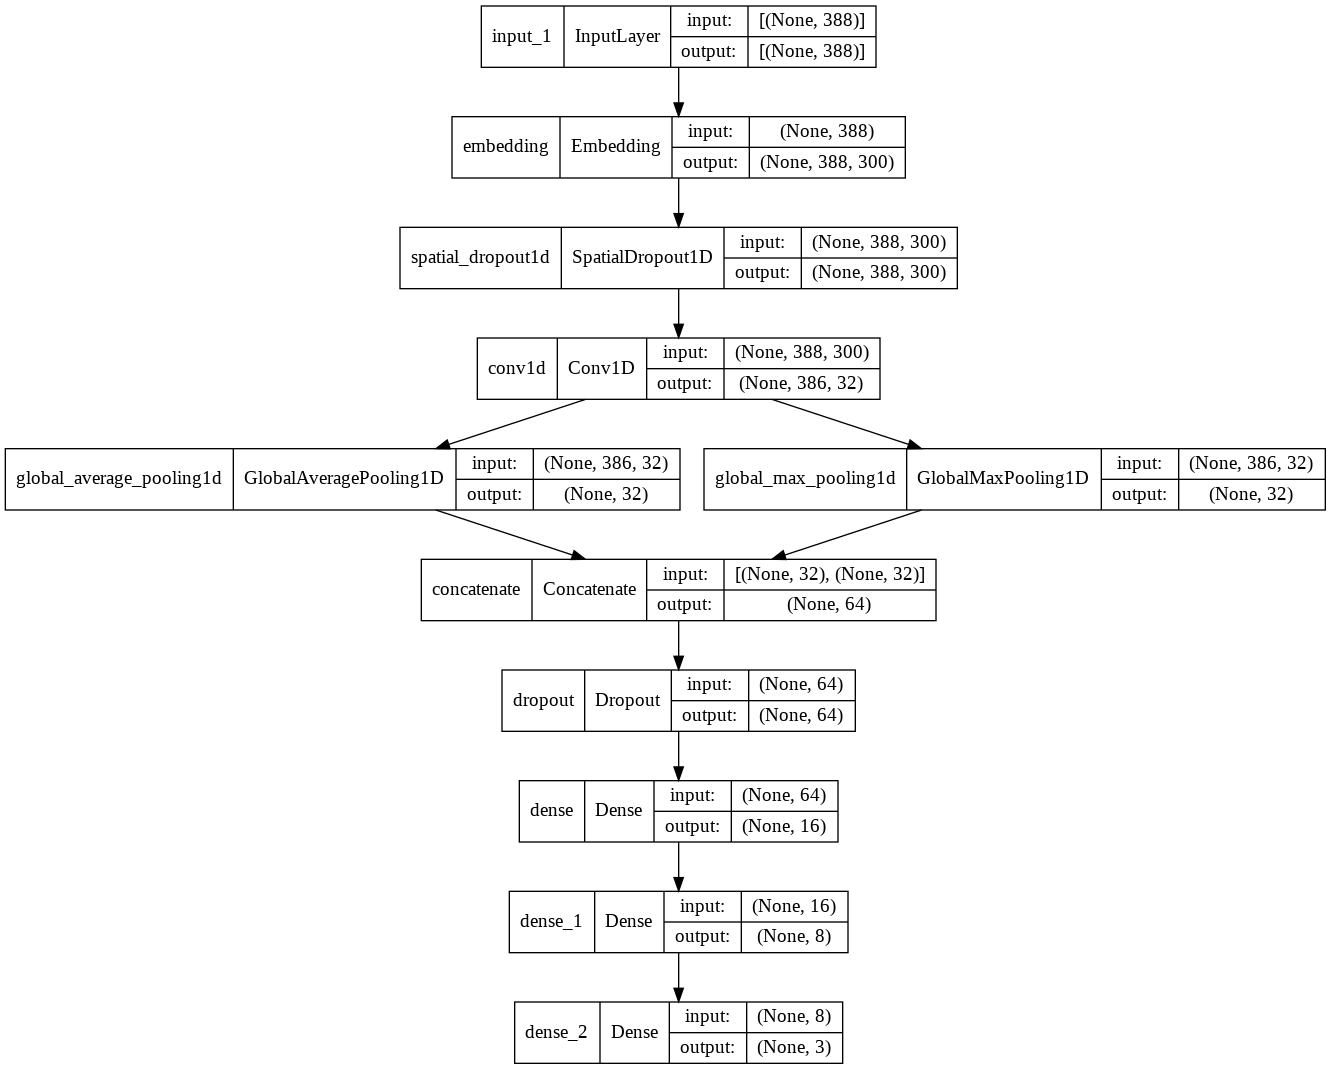

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.fit(X_train_pad, y_train, batch_size=128, epochs=30, verbose=1, class_weight=class_weights,
          validation_split = 0.2, callbacks=[callbacks])

Epoch 1/30
130/130 [==============================] - 18s 37ms/step - loss: 1.0486 - f1: 0.0912 - val_loss: 0.9329 - val_f1: 0.2918
Epoch 2/30
130/130 [==============================] - 4s 33ms/step - loss: 0.8385 - f1: 0.5118 - val_loss: 0.7307 - val_f1: 0.6595
Epoch 3/30
130/130 [==============================] - 4s 33ms/step - loss: 0.6709 - f1: 0.6961 - val_loss: 0.6323 - val_f1: 0.7364
Epoch 4/30
130/130 [==============================] - 4s 33ms/step - loss: 0.5179 - f1: 0.8026 - val_loss: 0.5531 - val_f1: 0.7886
Epoch 5/30
130/130 [==============================] - 4s 32ms/step - loss: 0.3896 - f1: 0.8587 - val_loss: 0.5478 - val_f1: 0.7936
Epoch 6/30
130/130 [==============================] - 4s 33ms/step - loss: 0.2986 - f1: 0.8945 - val_loss: 0.5381 - val_f1: 0.8087
Epoch 7/30
130/130 [==============================] - 4s 32ms/step - loss: 0.2384 - f1: 0.9164 - val_loss: 0.5686 - val_f1: 0.8082
Epoch 8/30
130/130 [==============================] - 4s 33ms/step - loss: 0.1924 

In [ ]:
print(model.evaluate(X_test_pad, y_test))

72/72 [==============================] - 1s 5ms/step - loss: 0.6349 - f1: 0.7951
[0.6349266767501831, 0.7951047420501709]


In [ ]:
y_pred = model.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred, target_names=(['Hate','Normal','Abusive'])))


18/18 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

        Hate       0.85      0.84      0.85      1231
      Normal       0.72      0.70      0.71       680
     Abusive       0.78      0.79      0.78       393

   micro avg       0.80      0.79      0.80      2304
   macro avg       0.78      0.78      0.78      2304
weighted avg       0.80      0.79      0.79      2304
 samples avg       0.79      0.79      0.79      2304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_score(y_test, y_pred, average="weighted")

0.7949460867292079

In [ ]:
from tensorflow import keras
keras.backend.clear_session()

In [ ]:
from sklearn import metrics
metric = metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average='weighted'), metrics.recall_score(y_test, y_pred, average='weighted'), metrics.precision_score(y_test, y_pred, average='weighted')

(0.0, 1.0)

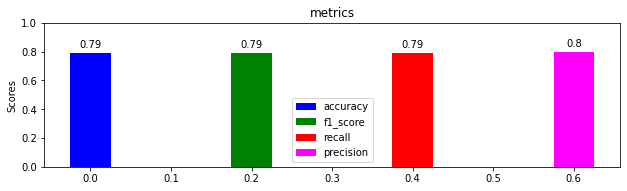

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')
def autolabel(rects):
  """Attach a text label above each bar in *rects*, displaying its height."""
  for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Training on Fasttext Embedding Only

In [ ]:
keras.backend.clear_session()

In [ ]:
inp=Input(shape=(maxlen, ))
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(fasttext_arabic_emb),#Set Fasttext Embedding
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
# x=Bidirectional(GRU(150, return_sequences = True))(x)
x=Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu')(x) 
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])


x=Dropout(0.1)(conc)
out=Dense(64, activation="relu")(x)
out=Dense(32, activation="relu")(x)

out=Dense(3, activation="softmax")(x)

model_ft=Model(inp,out)

mcp_save = ModelCheckpoint('model_fasttext.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)


In [ ]:
model_ft.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model_ft.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 388)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 388, 300)     7190100     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 388, 300)    0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 conv1d (Conv1D)                (None, 386, 32)      28832       ['spatial_dropout1d[0][0]']  

In [ ]:
model_ft.fit(X_train_pad, 
             y_train, 
             batch_size=128,
             epochs=20,
             verbose=1,
             class_weight=class_weights,
             validation_split=0.2,
             callbacks=[callbacks])

Epoch 1/20
130/130 [==============================] - 5s 34ms/step - loss: 0.8991 - f1: 0.3608 - val_loss: 0.6831 - val_f1: 0.6894
Epoch 2/20
130/130 [==============================] - 4s 32ms/step - loss: 0.5360 - f1: 0.7922 - val_loss: 0.5300 - val_f1: 0.7999
Epoch 3/20
130/130 [==============================] - 4s 32ms/step - loss: 0.3208 - f1: 0.8911 - val_loss: 0.5196 - val_f1: 0.8102
Epoch 4/20
130/130 [==============================] - 4s 32ms/step - loss: 0.2030 - f1: 0.9348 - val_loss: 0.5395 - val_f1: 0.8124
Epoch 5/20
130/130 [==============================] - 4s 32ms/step - loss: 0.1421 - f1: 0.9555 - val_loss: 0.5799 - val_f1: 0.8121
Epoch 6/20
130/130 [==============================] - 4s 32ms/step - loss: 0.1130 - f1: 0.9654 - val_loss: 0.6069 - val_f1: 0.8099
Epoch 7/20
130/130 [==============================] - 4s 32ms/step - loss: 0.0964 - f1: 0.9697 - val_loss: 0.6421 - val_f1: 0.8089
Epoch 8/20
130/130 [==============================] - 4s 32ms/step - loss: 0.0878 -

In [ ]:
print(model_ft.evaluate(X_test_pad, y_test))

72/72 [==============================] - 1s 5ms/step - loss: 0.5768 - f1: 0.8053
[0.5768049955368042, 0.8052881360054016]


In [ ]:
y_pred_ft = model_ft.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool_ft = np.argmax(y_pred, axis=1)
y_pred_ft = (y_pred_ft > 0.5)

print(classification_report(y_test, y_pred_ft, target_names=(['Hate','Normal','Abusive'])))


18/18 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

        Hate       0.87      0.84      0.86      1231
      Normal       0.76      0.68      0.72       680
     Abusive       0.76      0.83      0.80       393

   micro avg       0.82      0.79      0.81      2304
   macro avg       0.80      0.79      0.79      2304
weighted avg       0.82      0.79      0.80      2304
 samples avg       0.79      0.79      0.79      2304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
metric_ft = metrics.accuracy_score(y_test, y_pred_ft), metrics.f1_score(y_test, y_pred_ft, average='weighted'), metrics.recall_score(y_test, y_pred_ft, average='weighted'), metrics.precision_score(y_test, y_pred_ft, average='weighted')

(0.0, 1.0)

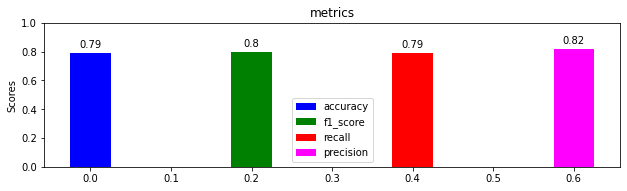

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric_ft[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric_ft[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric_ft[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric_ft[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')


autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Training on Aravec Embedding Only

In [ ]:
keras.backend.clear_session()

In [ ]:
inp=Input(shape=(maxlen, ))
x=Embedding(vocab_size + 1,embed_size,embeddings_initializer=Constant(aravec_emb),#Set Fasttext Embedding
            input_length=maxlen,trainable=True)(inp)
x = SpatialDropout1D(0.2)(x)
# x=Bidirectional(GRU(150, return_sequences = True))(x)
x=Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu')(x) 
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPool1D()(x)
conc = concatenate([avg_pool, max_pool])


x=Dropout(0.1)(conc)
out=Dense(64, activation="relu")(x)
out=Dense(32, activation="relu")(x)

out=Dense(3, activation="softmax")(x)

model_arav=Model(inp,out)

mcp_save = ModelCheckpoint('model_aravec.mdl_wts.hdf5', save_best_only=True,
                           monitor='val_loss', mode='min',patience = 5)


In [ ]:
model_arav.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=[f1])

In [ ]:
model_arav.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 388)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 388, 300)     7190100     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 388, 300)    0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 conv1d (Conv1D)                (None, 386, 32)      28832       ['spatial_dropout1d[0][0]']  

In [ ]:
model_arav.fit(X_train_pad, 
             y_train, 
             batch_size=128,
             epochs=20,
             verbose=1,
             class_weight=class_weights,
             validation_split=0.2,
             callbacks=[callbacks])

Epoch 1/20
130/130 [==============================] - 5s 35ms/step - loss: 1.0249 - f1: 0.4627 - val_loss: 0.8474 - val_f1: 0.5277
Epoch 2/20
130/130 [==============================] - 4s 33ms/step - loss: 0.8033 - f1: 0.5907 - val_loss: 0.7606 - val_f1: 0.6054
Epoch 3/20
130/130 [==============================] - 4s 32ms/step - loss: 0.6946 - f1: 0.6690 - val_loss: 0.6969 - val_f1: 0.6760
Epoch 4/20
130/130 [==============================] - 4s 33ms/step - loss: 0.5825 - f1: 0.7550 - val_loss: 0.6357 - val_f1: 0.7268
Epoch 5/20
130/130 [==============================] - 4s 32ms/step - loss: 0.4682 - f1: 0.8252 - val_loss: 0.5724 - val_f1: 0.7662
Epoch 6/20
130/130 [==============================] - 4s 32ms/step - loss: 0.3594 - f1: 0.8741 - val_loss: 0.5309 - val_f1: 0.7892
Epoch 7/20
130/130 [==============================] - 4s 32ms/step - loss: 0.2887 - f1: 0.9020 - val_loss: 0.5384 - val_f1: 0.7915
Epoch 8/20
130/130 [==============================] - 4s 32ms/step - loss: 0.2279 -

In [ ]:
print(model_arav.evaluate(X_test_pad, y_test))

72/72 [==============================] - 1s 4ms/step - loss: 0.5967 - f1: 0.7870
[0.5967130661010742, 0.7870326042175293]


In [ ]:
y_pred_arav = model_arav.predict(X_test_pad, batch_size=128, verbose=1)
y_pred_bool_ft = np.argmax(y_pred, axis=1)
y_pred_arav = (y_pred_arav > 0.5)

print(classification_report(y_test, y_pred_arav, target_names=(['Hate','Normal','Abusive'])))


18/18 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

        Hate       0.86      0.82      0.84      1231
      Normal       0.72      0.67      0.70       680
     Abusive       0.78      0.77      0.78       393

   micro avg       0.80      0.77      0.79      2304
   macro avg       0.79      0.76      0.77      2304
weighted avg       0.80      0.77      0.79      2304
 samples avg       0.77      0.77      0.77      2304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
metric_arav = metrics.accuracy_score(y_test, y_pred_arav), metrics.f1_score(y_test, y_pred_arav, average='weighted'), metrics.recall_score(y_test, y_pred_arav, average='weighted'), metrics.precision_score(y_test, y_pred_arav, average='weighted')

(0.0, 1.0)

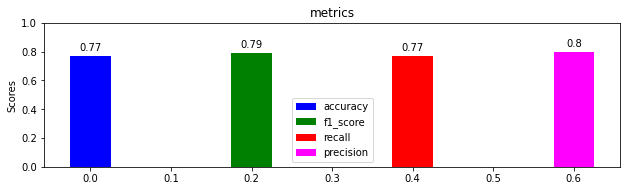

In [ ]:
fig = plt.figure()
fig.set_size_inches(8,2)
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(0.00,round(metric_arav[0], 2), color = 'b', width = 0.05)
rect2 = ax.bar(0.20, round(metric_arav[1], 2), color = 'g', width = 0.05)
rect3 = ax.bar(0.40, round(metric_arav[2], 2) , color = 'r', width = 0.05)
rect4 = ax.bar(0.60, round(metric_arav[3], 2) , color = (1, 0, 1), width = 0.05)

ax.set_ylabel('Scores')
ax.set_title('metrics')


autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
ax.legend(labels=['accuracy', 'f1_score', 'recall', 'precision'],loc='best')
plt.ylim(0, 1)

### Comparing the three results

In [ ]:
Data = [('Fasttext',) + metric_ft  ,
        ('AraVec',)+ metric_arav ,
         ('Fasttext + AraVec',)+ metric ]

In [ ]:
Results = pd.DataFrame(data =  Data , columns=['Embedding','Accuracy','F1_score','Recall','Precision'])

In [ ]:
Results

,Embedding,Accuracy,F1_score,Recall,Precision
0,Fasttext,0.792969,0.804699,0.792969,0.818447
1,AraVec,0.770399,0.786580,0.770399,0.803601
2,Fasttext + AraVec,0.788628,0.794946,0.788628,0.801426
